<a href="https://colab.research.google.com/github/cabamarcos/P1-RRNN/blob/main/P1_RRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

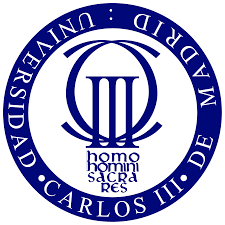

# PRÁCTICA 1: REDES DE NEURONAS
Autores: Pablo Hidalgo Delgado y Marcos Caballero Cortés   

NIAs: 100451225 y 100451247


#PREGUNTAS PROFE


*   La normalización debe ser de todo el conjunto de datos incluida la variable de respuesta (y) o solo de X????

* Si es solo de X, que habría que desnormalizar?? (en una clase dijiste que habría que desnormalizar)







## 1. Introducción
El propósito de esta práctica es abordar un problema real de regresión utilizando dos modelos de redes de neuronas supervisados:

*   El modelo lineal Adaline.
*   El modelo no-lineal Perceptrón Multicapa.

Se nos dispone de un conjunto de datos relacionados con .... . Debemos predecir el .... ,




Importamos todas las librerías que se van a utilizar a lo largo de la práctica

In [133]:
import random
import time

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Leer los conjuntos de datos


En primer lugar, leemos los conjuntos de datos y los guardamos en un mismo dataframe de pandas.

In [134]:
archivos_csv = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']

datos = pd.DataFrame()

# Concatenamos todos los archivos en un mismo dataframe
for archivo in archivos_csv:
    # Leemos el archivo
    df_temporal = pd.read_csv(archivo)
    # Concatenamos el archivo en el dataframe final
    datos = pd.concat([datos, df_temporal], ignore_index=True)

## 3. Análisis Exploratorio de Datos (EDA)
Antes de empezar con la división en datos de entrenamiento y test, vamos a realizar un pequeño análisis exploratorio de datos (EDA). De esta manera, podremos investigar y resumir las características más importantes de nuestro dataset. Esto nos servirá para comprender mejor los datos y optimizar la obtención de nuestro modelo.

### 3.1 Información básica

In [135]:
datos.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


El conjunto de datos se compone de 36733 instancias y 11 atributos de tipo float64.

También podemos observar que no existen columnas que contengan valores nulos.

### 3.2 Eliminación de atributos con valores constantes

A continuación, vamos a analizar si existen columnas constantes en nuestro conjunto de datos. En ese caso, podremos eliminarlas de nuestro dataset ya que no aportan ninguna información a la variable de respuesta y no existe riesgo de information leakage.

In [136]:
# Eliminamos las columnas con solo un valor único
columnas_constantes = []
for col in datos.columns:
    if datos[col].nunique() == 1:
        print(col)
        columnas_constantes.append(col)
if len(columnas_constantes) == 0:
  print("No existen atributos con valores constantes")

No existen atributos con valores constantes


### 3.3 Correlación entre atributos
En este apartado, vamos a estudiar la correlación entre los atributos de los datos disponibles. Nos interesa conocer el conjunto de atributos que tienen una correlación especialmente alta (> 0.95) entre ellos para así poder determinar cuáles aportan a la variable de respuesta una información extremadamente similar que su par y, en consecuencia, poder plantearnos descartar uno de ellos para reducir la dimensionalidad del problema.

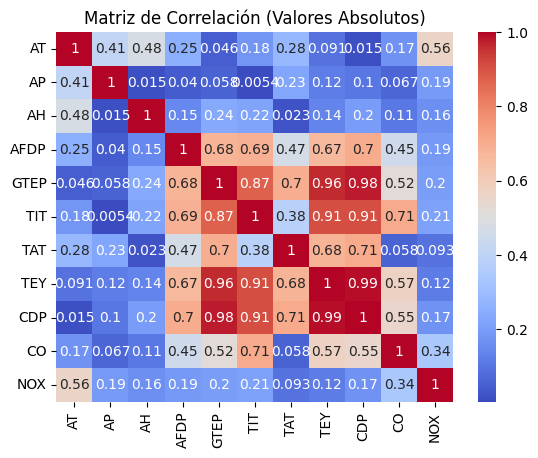

In [137]:
matriz_correlacion = datos.corr().abs()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Valores Absolutos)')
plt.show()

Como vemos, TEY está muy correlacionada con CDP y GTEP; y CDP está muy correlacionada con GTEP. Como podemos observar, las tres columnas están muy correlacionadas, por lo que al ser TEY nuestra columna objetivo, no podemos suprimir datos que están tan correlacionados con la solución, ya que supondría empeorar las predicciones.

TAMBIÉN OBSERVAMOS QUE GTEP Y CDP ESTÁN ALTAMENTE CORRELACIONADAS ENTRE SÍ. ADEMÁS, FIJÁNDONOS EN AMBAS COLUMNAS EN LA MATRIZ DE CORRELACIÓN, PODEMOS OBSERVAR QUE LOS VALORES SON BASTANTE SIMILARES Y LA CORRELACIÓN CON LAS DEMÁS ES BASTANTE PARECIDA. ESTO NOS HACE PENSAR QUE PODEMOS ELIMINAR UNA DE ESTAS COLUMNAS
¡¡¡¡¡¡....... REDACTAR MEJOR........!!!!!

## 5. División de datos en train, validation y test.
Una vez explorado y analizado nuestro conjunto de datos, dividimos el dataset en conjuntos de entrenamiento (train), prueba (test) y validación (validation). Para ello, utilizamos la función train_test_split de la librería sklearn. Dividimos los datos en un 70% para train, un 15% para test, y un 15% para validation tal y como se nos pide en el enunciado de la práctica.

Antes de realizar la división, debemos separar la variable de respuesta del resto del conjunto de datos.

In [138]:
X = datos.drop("TEY", axis = 1)
y = datos["TEY"]
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,11.771,3.31340,64.738


Dividimos el conjunto de datos. Lo hacemos especificando el parámetro random_state a 42 para que se aleatorizen los datos y se pueda reproducir el mismo resultado


In [139]:
# Dividir los datos originales en conjuntos de entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir el conjunto de prueba en conjuntos de validación (15%) y test (15%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
22147,6.1979,1026.40,76.300,4.2636,33.558,1100.1,526.86,14.181,0.94421,67.504
10443,29.2230,1009.70,56.972,4.7923,30.860,1100.0,538.49,13.341,0.78109,57.426
24632,16.2920,1015.10,81.539,3.7828,25.249,1081.7,549.84,11.906,1.61800,63.221
2424,16.9260,1004.60,97.488,2.9684,18.310,1035.7,541.51,10.135,9.55540,84.777
30253,9.9030,1008.80,88.147,4.2491,33.110,1099.9,535.44,13.836,2.89860,58.775
...,...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,10.523,4.65130,77.071
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,11.891,1.73490,74.164
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,12.253,1.65320,70.322
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,11.916,0.82952,79.388


## 4. Preproceso
Previamente a entrenar los modelos, debemos realizar una transformación de los datos para que puedan ser interpretados por el algoritmo de manera eficiente. Las tranformaciones de datos que realizamos son las siguientes:

### 4.1 Normalización

Para que no se produzca information leakage, normalizamos todos los datos con el mínimo y máximo obtenido del conjunto de entrenamiento.

In [140]:
max_min = {}
for columna in X_train:
  min = X_train[columna].min()
  max = X_train[columna].max()
  # Guardamos el valor maximo y minimo de cada columna para después poder desnormalizar
  max_min[columna] = {'min': min, 'max': max}
  # Conjunto de entrenamiento
  X_train[columna] = (X_train[columna] - min)/(max - min)
  # Conjunto de validación
  X_validation[columna] = (X_validation[columna] - min)/(max - min)
  # Conjunto de test
  X_test[columna] = (X_test[columna] - min)/(max - min)

X_validation

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
9060,0.557123,0.192850,0.771954,0.382350,0.119732,0.570430,0.968410,0.134681,0.069354,0.507345
33780,0.854839,0.477656,0.423133,0.428386,0.543097,0.990010,0.851150,0.629987,0.020963,0.291123
7555,0.460349,0.264548,0.788218,0.378948,0.284821,0.834166,0.988375,0.378076,0.037813,0.513994
36051,0.636087,0.624628,0.519747,0.402359,0.574898,0.991009,0.740460,0.688849,0.039350,0.272443
8023,0.362160,0.769613,0.780295,0.663009,0.657312,0.992008,0.467273,0.757741,0.011095,0.399521
...,...,...,...,...,...,...,...,...,...,...
27760,0.563733,0.668322,0.853462,0.336059,0.194239,0.641359,0.984837,0.250132,0.070923,0.374991
13160,0.710392,0.541212,0.771603,0.434604,0.350421,0.914086,0.984837,0.426149,0.034201,0.410329
15718,0.263929,0.543198,0.880762,0.162762,0.247545,0.810190,0.985342,0.349118,0.037432,0.608170
10968,0.861235,0.457795,0.430571,0.400110,0.368320,0.920080,0.975486,0.442993,0.035294,0.386086


## 6. Implementación del modelo lineal Adaline

In [141]:
class Adaline:
    def __init__(self, learning_rate=0.1, epochs=100, random_seed = 45):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.umbral = None
        self.random_seed = random_seed
        self.error_entrenamiento = []
        self.historical_weights = []

    def __initialize_Adaline(self,X):
        np.random.seed(self.random_seed)
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1, 1, size=(n_features, 1))
        self.umbral = np.random.uniform(-1,1)

    def fit(self, X, y):
        # Inicializamos el Adaline
        self.__initialize_Adaline(X)
        # Convertimos X e y a dos arrays de numpy
        X = X.values
        y = y.to_numpy().reshape(-1, 1)

        for i in range(self.epochs):
          # Obtenemos la salida
          salida = np.dot(X, self.weights) + self.umbral

          # Obtenemos los errores
          errores = y - salida

          # Actualizamos el vector de pesos
          new_weights = self.learning_rate * X * errores # Calculamos los nuevos pesos para cada entrada
          media_new_weights = np.mean(new_weights, axis=0) # Calculamos la media de los nuevos pesos
          self.weights += media_new_weights.reshape(-1, 1)

          # Actualizamos el umbral
          self.umbral += self.learning_rate * errores.mean()

          # Obtenemos y guardamos el error medio
          error_entrenamiento = errores.mean()
          self.error_entrenamiento.append(error_entrenamiento)

    def predict(self, X):
      # Convertimos X a un array de numpy
      X = X.values
      salida = np.dot(X, self.weights) + self.umbral
      return salida



A continuación, comprobamos nuestra implementación del Adaline utilizando los datos artificiales proporcionados en aulaglobal. Para ello, entrenaremos varios modelos con diferentes tasas de aprendizaje y analizaremos el error de entrenamiento.

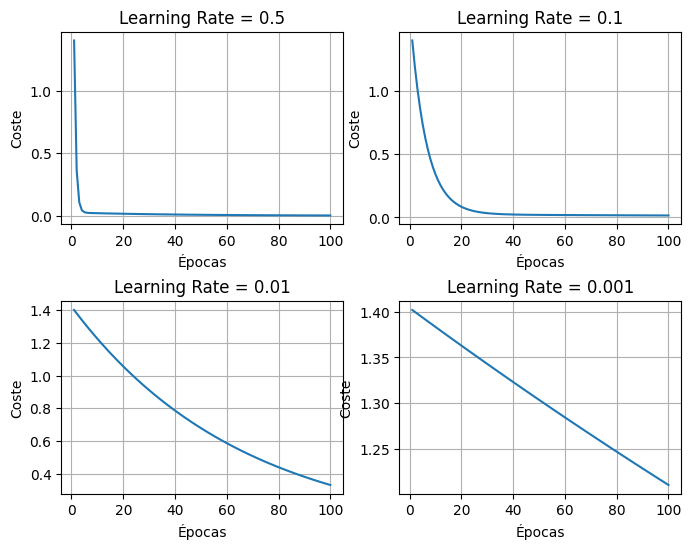

Tiempo de entrenamiento para learning rate 0.5 = 0.003384828567504883 segundos
Tiempo de entrenamiento para learning rate 0.1 = 0.0031516551971435547 segundos
Tiempo de entrenamiento para learning rate 0.01 = 0.003191232681274414 segundos
Tiempo de entrenamiento para learning rate 0.001 = 0.0031151771545410156 segundos


In [142]:
# Leemos el conjunto de datos de aulaglobal
datos_prueba = pd.read_csv("datosArtificiales.txt", delimiter=' ', header=None)
# Dividimos los datos en atributos (X) y salida (y)
X_prueba = datos_prueba.iloc[:,:2]
y_prueba = datos_prueba.iloc[:,-1]

# Definimos las tasas de aprendizaje a probar
learning_rates = [0.5, 0.1, 0.01, 0.001]
epochs = 100

# Representación gráfica de la evolución del error de entrenamiento
fig, axs = plt.subplots(2, 2, figsize=(8, 6)) # Creamos un grid de 2x2 para las gráficas
fig.subplots_adjust(hspace=0.4)

tiempo_entrenamiento = []
for i, lr in enumerate(learning_rates):
    # Entrenamos el modelo con la tasa de aprendizaje actual
    modelo_prueba = Adaline(learning_rate=lr, epochs=epochs)
    start_time = time.time()
    modelo_prueba.fit(X_prueba, y_prueba)
    tiempo_total = time.time() - start_time
    tiempo_entrenamiento.append(tiempo_total)
    # Representamos gráficamente el error de entranamiento de cada modelo con diferente tasa de aprendizaje
    ax = axs[i // 2, i % 2]
    ax.plot(range(1, len(modelo_prueba.error_entrenamiento) + 1), modelo_prueba.error_entrenamiento)
    ax.set_title(f'Learning Rate = {lr}')
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Coste')
    ax.grid()

plt.show()

# Imprimimos los tiempos de entrenamiento correspondientes a cada tasa de aprendizaje
for lr, tiempo in zip(learning_rates, tiempo_entrenamiento):
    print(f"Tiempo de entrenamiento para learning rate {lr} = {tiempo} segundos")

Podemos observar que el error cuadrático medio desciende en cada época, y se va aproximando a 0, por lo que el modelo está correctamente implementado.

## 7. Entrenamiento

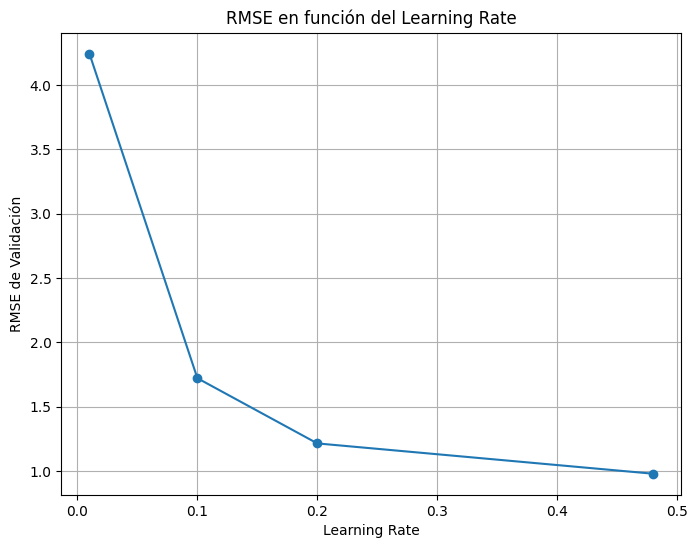

[0.978729024951948, 1.2143994507861884, 1.7213668720361646, 4.244226662953398]
[2.351315498352051, 2.167320966720581, 2.104311943054199, 2.1230661869049072]


In [160]:
# Lista de tasas de aprendizaje a probar
learning_rates = [0.48, 0.2, 0.1, 0.01]

# Lista para almacenar los errores RMSE de validación
rmse_validation_values = []
# Lista para almacenar los tiempos de entrenamiento
tiempo_entrenamiento = []
# Entrenar el modelo con diferentes tasas de aprendizaje y calcular el RMSE
for lr in learning_rates:
    modelo = Adaline(learning_rate=lr, epochs=5000)
    start_time = time.time()
    modelo.fit(X_train, y_train)
    tiempo_total = time.time() - start_time
    tiempo_entrenamiento.append(tiempo_total)
    prediccion = modelo.predict(X_validation)
    rmse_validation = np.sqrt(mean_squared_error(y_validation, prediccion))
    rmse_validation_values.append(rmse_validation)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, rmse_validation_values, marker='o', linestyle='-')
plt.title('RMSE en función del Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE de Validación')
plt.grid(True)
plt.show()

print("Valores del error de validación: ",rmse_validation_values)
print("Tiempo de entrenamiento ",tiempo_entrenamiento)




learning_rate = 0.49 el error se dispara!!

Learning_rate óptimo: 0.48

Elegimos el mejor modelo y lo entrenamos con estos hiperparametros incluyendo el conjunto de validación en el conjunto de entrenamiento para probarlo con el conjunto de test.